`wu_iterative_NN_training_copy.ipynb`

In [1]:
import pandas as pd, tensorflow as tf,  matplotlib.pyplot as plt, sys
from sklearn.preprocessing import MinMaxScaler

from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FuncFormatter
from plot_styles import set_plotstyles
set_plotstyles()
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/Users/andrew/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#import data
data_path = 'data/wu_zero_phase.csv'
data_df = pd.read_csv(data_path, dtype = float)

# split random 80% / 20%
training_data_df = data_df.sample(frac = 0.8)
testing_data_df = data_df.loc[~data_df.index.isin(training_data_df.index)]

# separate input features from output
X_training = training_data_df.drop('slope', axis = 1).values
Y_training = training_data_df[['slope']].values

X_testing = testing_data_df.drop('slope', axis = 1).values
Y_testing = testing_data_df[['slope']].values

# setup data scalers
X_scaler = MinMaxScaler(feature_range = (0,1))
Y_scaler = MinMaxScaler(feature_range = (0,1))

# scale data
X_scaled_training = X_scaler.fit_transform(X_training)
Y_scaled_training = Y_scaler.fit_transform(Y_training)

X_scaled_testing = X_scaler.transform(X_testing)
Y_scaled_testing = Y_scaler.transform(Y_testing)

In [3]:
number_of_inputs = X_scaled_training.shape[1]
number_of_outputs = Y_scaled_training.shape[1]

In [8]:
num_layers = 9
r = (number_of_inputs/number_of_outputs)**(1/(num_layers + 1))

layer_1_nodes = int(number_of_outputs * r**9)
layer_2_nodes = int(number_of_outputs * r**8)
layer_3_nodes = int(number_of_outputs * r**7)
layer_4_nodes = int(number_of_outputs * r**6)
layer_5_nodes = int(number_of_outputs * r**5)
layer_6_nodes = int(number_of_outputs * r**4)
layer_7_nodes = int(number_of_outputs * r**3)
layer_8_nodes = int(number_of_outputs * r**2)
layer_9_nodes = int(number_of_outputs * r**1)

learning_rate = 0.0015
training_epochs = 1000

In [9]:
# change log path
logdir = str(layer_1_nodes) + '_' + str(layer_2_nodes) + '_' + str(layer_3_nodes) + '_' + str(layer_4_nodes) + '_' + str(layer_5_nodes) + '_' + str(layer_6_nodes) + '_' + str(layer_7_nodes)+ '_' + str(layer_8_nodes)+ '_' + str(layer_9_nodes)
logdir += '_acc_a'
logdir

'512_256_128_64_32_16_8_4_2_acc_a'

In [25]:
tf.reset_default_graph()

# Input Layer
with tf.variable_scope('input'):
    X  = tf.placeholder(tf.float32, shape = (None, number_of_inputs))

# Layer 1
with tf.variable_scope('layer_1'):

    biases = tf.get_variable(name = "biases1",
                             shape = [layer_1_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights1",
                              shape  = [number_of_inputs, layer_1_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_1_output = tf.nn.relu(tf.matmul(X, weights) + biases)

# Layer 2
with tf.variable_scope('layer_2'):

    biases = tf.get_variable(name = "biases2",
                             shape = [layer_2_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights2",
                              shape  = [layer_1_nodes, layer_2_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_2_output = tf.nn.relu(tf.matmul(layer_1_output, weights) + biases)

# Layer 3
with tf.variable_scope('layer_3'):

    biases = tf.get_variable(name = "biases3",
                             shape = [layer_3_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights3",
                              shape  = [layer_2_nodes, layer_3_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_3_output = tf.nn.relu(tf.matmul(layer_2_output, weights) + biases)

# Layer 4
with tf.variable_scope('layer_4'):

    biases = tf.get_variable(name = "biases4",
                             shape = [layer_4_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights4",
                              shape  = [layer_3_nodes, layer_4_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_4_output = tf.nn.relu(tf.matmul(layer_3_output, weights) + biases)


# Layer 5
with tf.variable_scope('layer_5'):

    biases = tf.get_variable(name = "biases5",
                             shape = [layer_5_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights5",
                              shape  = [layer_4_nodes, layer_5_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_5_output = tf.nn.relu(tf.matmul(layer_4_output, weights) + biases)

# Layer 6
with tf.variable_scope('layer_6'):

    biases = tf.get_variable(name = "biases6",
                             shape = [layer_6_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights6",
                              shape  = [layer_5_nodes, layer_6_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_6_output = tf.nn.relu(tf.matmul(layer_5_output, weights) + biases)

# Layer 7
with tf.variable_scope('layer_7'):

    biases = tf.get_variable(name = "biases7",
                             shape = [layer_7_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights7",
                              shape  = [layer_6_nodes, layer_7_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_7_output = tf.nn.relu(tf.matmul(layer_6_output, weights) + biases)

# Layer 8
with tf.variable_scope('layer_8'):

    biases = tf.get_variable(name = "biases8",
                             shape = [layer_8_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights8",
                              shape  = [layer_7_nodes, layer_8_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_8_output = tf.nn.relu(tf.matmul(layer_7_output, weights) + biases)

# Layer 9
with tf.variable_scope('layer_9'):

    biases = tf.get_variable(name = "biases9",
                             shape = [layer_9_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights9",
                              shape  = [layer_8_nodes, layer_9_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_9_output = tf.nn.relu(tf.matmul(layer_8_output, weights) + biases)


# Output layer

with tf.variable_scope('output'):

    biases = tf.get_variable(name = "biases_out",
                             shape = [number_of_outputs],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights_out",
                              shape  = [layer_9_nodes, number_of_outputs],
                         initializer = tf.contrib.layers.xavier_initializer())


    prediction = tf.nn.relu(tf.matmul(layer_9_output, weights) + biases)

with tf.variable_scope('cost'):

    Y = tf.placeholder(tf.float32, shape = (None, 1))
    cost = tf.reduce_mean(tf.squared_difference(prediction, Y))

with tf.variable_scope('accuracy'):

    Y = tf.placeholder(tf.float32, shape = (None, 1))
    accuracy = tf.reduce_mean(tf.divide(tf.add(prediction,tf.multiply(Y,-1.)), Y))


with tf.variable_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate, epsilon=1e-08).minimize(cost)

with tf.variable_scope('logging'):
    tf.summary.scalar('current_cost', cost)
    summary = tf.summary.merge_all()
    
saver = tf.train.Saver()

In [26]:
with tf.Session() as session:

    session.run(tf.global_variables_initializer())

    training_writer = tf.summary.FileWriter('logs/' + logdir + '/training', session.graph)
    testing_writer = tf.summary.FileWriter('logs/' + logdir + '/testing', session.graph)

    for epoch in range(training_epochs):

        # Feed in the training data and do one stepf NN training
        session.run(optimizer,
                    feed_dict = {X: X_scaled_training, Y: Y_scaled_training})

        training_feed = {X: X_scaled_training, Y: Y_scaled_training, Y: Y_scaled_training}
        training_cost, training_summary, training_accuracy = session.run([cost, accuracy, summary],
                                                feed_dict = training_feed)

        testing_feed =  {X: X_scaled_testing, Y: Y_scaled_testing}
        testing_cost, testing_summary, testing_accuracy = session.run([cost, accuracy, summary],
                                                     feed_dict = testing_feed)
        sys.stdout.write('\r epoch: {:4.0f} testing_accuracy: {:2.10f}'.format(epoch, testing_accuracy))
        
        training_writer.add_summary(training_summary, epoch)
        training_writer.add_summary(accuracy, epoch)
        training_writer.flush()

        testing_writer.add_summary(testing_summary, epoch)
        testing_writer.add_summary(accuracy, epoch)
        testing_writer.flush()

    model_save_location = 'logs/' + logdir + '_model' + '/trained_model.ckpt'
    save_path = saver.save(session, model_save_location)

InvalidArgumentError: You must feed a value for placeholder tensor 'cost/Placeholder' with dtype float and shape [?,1]
	 [[Node: cost/Placeholder = Placeholder[dtype=DT_FLOAT, shape=[?,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'cost/Placeholder', defined at:
  File "/Users/andrew/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/andrew/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-46c423e4ea18>", line 152, in <module>
    Y = tf.placeholder(tf.float32, shape = (None, 1))
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1808, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 4848, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/Users/andrew/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'cost/Placeholder' with dtype float and shape [?,1]
	 [[Node: cost/Placeholder = Placeholder[dtype=DT_FLOAT, shape=[?,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [8]:
with tf.Session() as session:
    saver.restore(session,'logs/512_256_128_64_32_16_8_4_2_a_model/trained_model.ckpt')
    
    prediction_scaled = session.run(prediction, feed_dict = {X: X_scaled_testing})
    
    # the predictions but in the original units
    prediction_unscaled = Y_scaler.inverse_transform(prediction_scaled)

INFO:tensorflow:Restoring parameters from logs/512_256_128_64_32_16_8_4_2_a_model/trained_model.ckpt


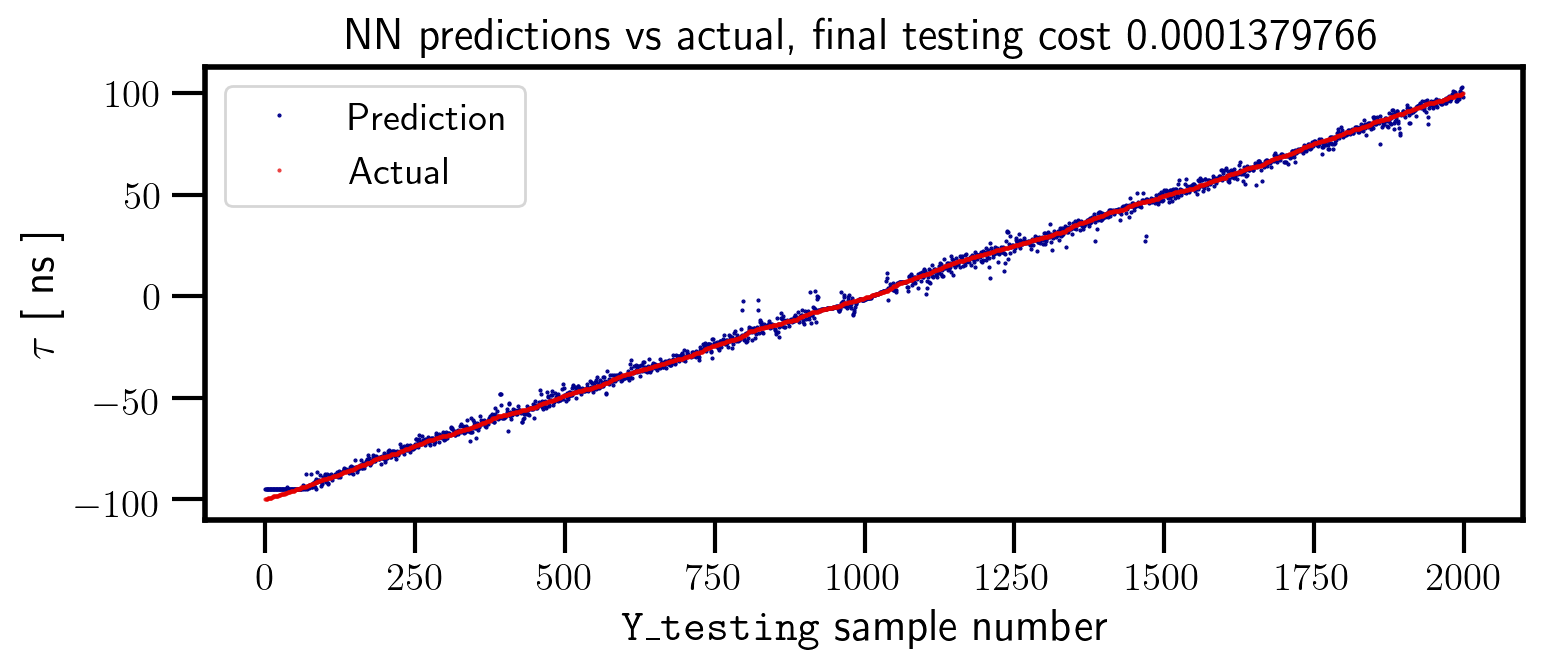

In [9]:
sorting_idx = np.argsort(Y_testing.T[0])

fig, ax = plt.subplots(figsize = (8.5, 3), dpi = 100)

ax.set_title('NN predictions vs actual, final testing cost 0.0001379766')
ax.plot(prediction_unscaled.T[0][sorting_idx],
        linestyle = 'none', marker = '.', markersize = 1,
        color = 'darkblue', label = 'Prediction')

ax.plot(Y_testing.T[0][sorting_idx],
        linestyle = 'none', marker = '.', markersize = 1, alpha = 0.75, 
        color = '#E50000', label = 'Actual')

ax.set_ylabel(r'$\tau$ [ ns ]')
ax.set_xlabel(r'$\texttt{Y\_testing}$ sample number')
ax.legend( loc = 'best')
plt.show()

In [10]:
NN_SCORE = sum((Y_scaled_testing.T[0] - prediction_scaled.T[0])**2)
NN_SCORE

0.2759531758101374

In [11]:
np.std(abs(Y_testing.T[0] - prediction_unscaled.T[0]))

1.7475748713358723

In [12]:
np.mean(abs(Y_testing.T[0] - prediction_unscaled.T[0]))

1.569649404634896

In [13]:
#import data
data_path = 'data/wu_rand_phase.csv'
data_df = pd.read_csv(data_path, dtype = float)

# split random 80% / 20%
training_data_df = data_df.sample(frac = 0.8)
testing_data_df = data_df.loc[~data_df.index.isin(training_data_df.index)]

# separate input features from output
X_training = training_data_df.drop('slope', axis = 1).values
Y_training = training_data_df[['slope']].values

X_testing = testing_data_df.drop('slope', axis = 1).values
Y_testing = testing_data_df[['slope']].values

# setup data scalers
X_scaler = MinMaxScaler(feature_range = (0,1))
Y_scaler = MinMaxScaler(feature_range = (0,1))

# scale data
X_scaled_training = X_scaler.fit_transform(X_training)
Y_scaled_training = Y_scaler.fit_transform(Y_training)

X_scaled_testing = X_scaler.transform(X_testing)
Y_scaled_testing = Y_scaler.transform(Y_testing)

In [14]:
# change log path
logdir = str(layer_1_nodes) + '_' + str(layer_2_nodes) + '_' + str(layer_3_nodes) + '_' + str(layer_4_nodes) + '_' + str(layer_5_nodes) + '_' + str(layer_6_nodes) + '_' + str(layer_7_nodes)+ '_' + str(layer_8_nodes)+ '_' + str(layer_9_nodes)
logdir += '_b'
logdir

'512_256_128_64_32_16_8_4_2_b'

In [31]:
with tf.Session() as session:

    saver.restore(session,'logs/512_256_128_64_32_16_8_4_2_a_model/trained_model.ckpt')

    training_writer = tf.summary.FileWriter('logs/' + logdir + '/training', session.graph)
    testing_writer = tf.summary.FileWriter('logs/' + logdir + '/testing', session.graph)

    for epoch in range(20):

        # Feed in the training data and do one stepf NN training
        session.run(optimizer,
                    feed_dict = {X: X_scaled_training, Y: Y_scaled_training})

        training_feed = {X: X_scaled_training, Y: Y_scaled_training}
        training_cost, training_summary = session.run([cost, summary],
                                                feed_dict = training_feed)

        testing_feed =  {X: X_scaled_testing, Y: Y_scaled_testing}
        testing_cost, testing_summary = session.run([cost, summary],
                                                     feed_dict = testing_feed)
        sys.stdout.write('\r epoch: {:4.0f} testing_cost: {:2.25f}'.format(epoch, testing_cost))
        
        training_writer.add_summary(training_summary, epoch)
        testing_writer.add_summary(testing_summary, epoch)
        testing_writer.flush()
        training_writer.flush()

    model_save_location = 'logs/' + logdir + '_model' + '/trained_model.ckpt'
    save_path = saver.save(session, model_save_location)

INFO:tensorflow:Restoring parameters from logs/512_256_128_64_32_16_8_4_2_a_model/trained_model.ckpt
 epoch:   19 testing_cost: 0.0000000000000000000000000

In [27]:
with tf.Session() as session:
    saver.restore(session,'logs/512_256_128_64_32_16_8_4_2_b_model/trained_model.ckpt')
    
    prediction_scaled = session.run(prediction, feed_dict = {X: X_scaled_testing})
    
    # the predictions but in the original units
    prediction_unscaled = Y_scaler.inverse_transform(prediction_scaled)

INFO:tensorflow:Restoring parameters from logs/512_256_128_64_32_16_8_4_2_b_model/trained_model.ckpt


array([[7.70021],
       [7.70021],
       [7.70021],
       ...,
       [7.70021],
       [7.70021],
       [7.70021]], dtype=float32)